<a href="https://colab.research.google.com/github/AzriHarniza22/Kelompok-6-POPL/blob/main/UAS_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== SETUP GPU T4 ===
GPU tidak tersedia, menggunakan CPU
TensorFlow version: 2.18.0
=== KELAS CIFAR-10 ===
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
CIFAR-10 IMAGE CLASSIFICATION COMPETITION

=== MEMBUAT STRUKTUR DIREKTORI ===
Direktori dibuat: data
Direktori dibuat: data/train_images
Direktori dibuat: data/test_images
Direktori dibuat: models
Direktori dibuat: results
Direktori dibuat: plots

=== LOADING DATASET CIFAR-10 ===
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Data training: (50000, 32, 32, 3)
Label training: (50000, 1)
Data testing: (10000, 32, 32, 3)
Label testing: (10000, 1)

=== EXPLORATORY DATA ANALYSIS ===
Distribusi kelas dalam training data:
airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images


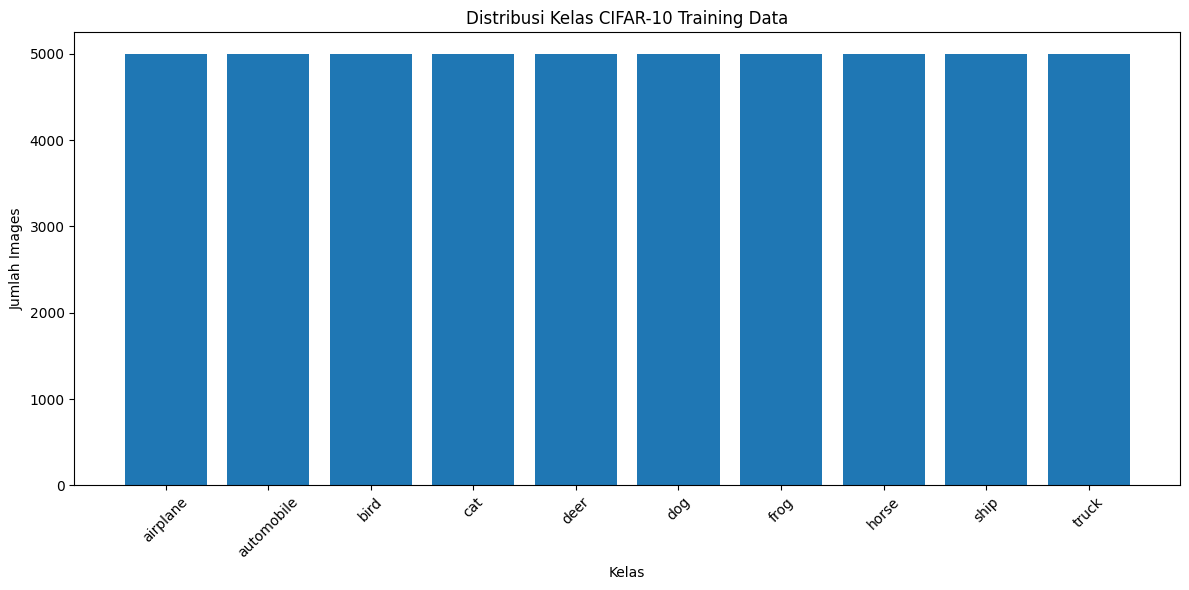

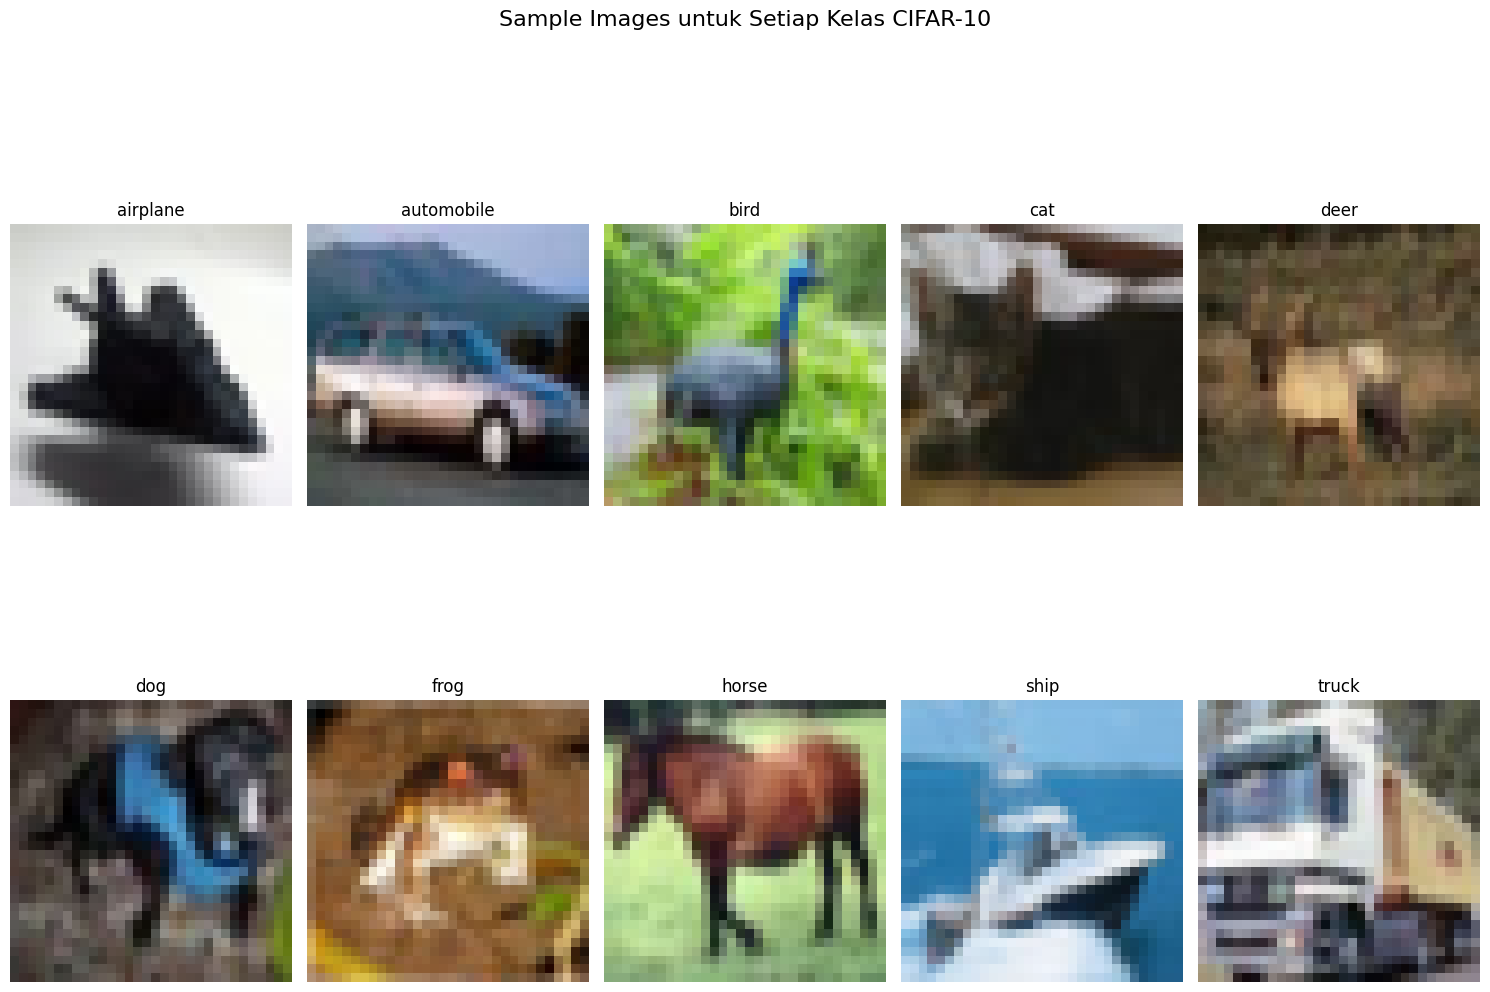


Statistik Images:
Shape: (50000, 32, 32, 3)
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 120.71
Std pixel value: 64.15

=== MENYIMPAN DATA SEBAGAI FILE ===
Menyimpan training images...
Training images tersimpan: 5000/50000
Training images tersimpan: 10000/50000
Training images tersimpan: 15000/50000
Training images tersimpan: 20000/50000
Training images tersimpan: 25000/50000
Training images tersimpan: 30000/50000
Training images tersimpan: 35000/50000
Training images tersimpan: 40000/50000
Training images tersimpan: 45000/50000
Training images tersimpan: 50000/50000
File train.csv tersimpan dengan 50000 baris
Menyimpan test images...
Test images tersimpan: 1000/10000
Test images tersimpan: 2000/10000
Test images tersimpan: 3000/10000
Test images tersimpan: 4000/10000
Test images tersimpan: 5000/10000
Test images tersimpan: 6000/10000
Test images tersimpan: 7000/10000
Test images tersimpan: 8000/10000
Test images tersimpan: 9000/10000
Test images tersimpan: 10000/10000
Fi

In [1]:
# CIFAR-10 Image Classification Competition
# Tahap 1: Setup Environment dan Data Loading

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

# Setup GPU untuk T4
print("=== SETUP GPU T4 ===")
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print(f"GPU tersedia: {physical_devices}")
    print(f"TensorFlow GPU Support: {tf.test.is_gpu_available()}")
else:
    print("GPU tidak tersedia, menggunakan CPU")

print(f"TensorFlow version: {tf.__version__}")

# Definisi kelas CIFAR-10
CIFAR10_CLASSES = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

CLASS_TO_INDEX = {v: k for k, v in CIFAR10_CLASSES.items()}

print("=== KELAS CIFAR-10 ===")
for idx, class_name in CIFAR10_CLASSES.items():
    print(f"{idx}: {class_name}")

# Fungsi untuk membuat direktori
def create_directories():
    print("\n=== MEMBUAT STRUKTUR DIREKTORI ===")
    directories = [
        'data',
        'data/train_images',
        'data/test_images',
        'models',
        'results',
        'plots'
    ]

    for directory in directories:
        os.makedirs(directory, exist_ok=True)
        print(f"Direktori dibuat: {directory}")

# Fungsi untuk load dan preprocess data
def load_cifar10_data():
    print("\n=== LOADING DATASET CIFAR-10 ===")

    # Load CIFAR-10 dataset
    (x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = keras.datasets.cifar10.load_data()

    print(f"Data training: {x_train_orig.shape}")
    print(f"Label training: {y_train_orig.shape}")
    print(f"Data testing: {x_test_orig.shape}")
    print(f"Label testing: {y_test_orig.shape}")

    # Flatten labels
    y_train_orig = y_train_orig.flatten()
    y_test_orig = y_test_orig.flatten()

    return x_train_orig, y_train_orig, x_test_orig, y_test_orig

# Fungsi untuk save images dan CSV
def save_data_as_files(x_train, y_train, x_test, y_test):
    print("\n=== MENYIMPAN DATA SEBAGAI FILE ===")

    # Save training images dan buat train.csv
    train_data = []
    print("Menyimpan training images...")
    for i in range(len(x_train)):
        filename = f"{i}.png"
        filepath = f"data/train_images/{filename}"

        # Convert array ke PIL Image dan save
        img = Image.fromarray(x_train[i])
        img.save(filepath)

        # Tambah ke CSV data
        class_name = CIFAR10_CLASSES[y_train[i]]
        train_data.append({'id': filename, 'label': class_name})

        if (i + 1) % 5000 == 0:
            print(f"Training images tersimpan: {i + 1}/{len(x_train)}")

    # Save train.csv
    train_df = pd.DataFrame(train_data)
    train_df.to_csv('data/train.csv', index=False)
    print(f"File train.csv tersimpan dengan {len(train_df)} baris")

    # Save test images dan buat test.csv
    test_data = []
    print("Menyimpan test images...")
    for i in range(len(x_test)):
        filename = f"{50000 + i}.png"  # Mulai dari 50000 seperti format submission
        filepath = f"data/test_images/{filename}"

        # Convert array ke PIL Image dan save
        img = Image.fromarray(x_test[i])
        img.save(filepath)

        # Tambah ke CSV data (tanpa label untuk test)
        test_data.append({'id': filename})

        if (i + 1) % 1000 == 0:
            print(f"Test images tersimpan: {i + 1}/{len(x_test)}")

    # Save test.csv
    test_df = pd.DataFrame(test_data)
    test_df.to_csv('data/test.csv', index=False)
    print(f"File test.csv tersimpan dengan {len(test_df)} baris")

    return train_df, test_df

# Fungsi untuk exploratory data analysis
def perform_eda(x_train, y_train):
    print("\n=== EXPLORATORY DATA ANALYSIS ===")

    # Distribusi kelas
    unique, counts = np.unique(y_train, return_counts=True)
    class_distribution = dict(zip(unique, counts))

    print("Distribusi kelas dalam training data:")
    for class_idx, count in class_distribution.items():
        class_name = CIFAR10_CLASSES[class_idx]
        print(f"{class_name}: {count} images")

    # Plot distribusi kelas
    plt.figure(figsize=(12, 6))
    class_names = [CIFAR10_CLASSES[i] for i in unique]
    plt.bar(class_names, counts)
    plt.title('Distribusi Kelas CIFAR-10 Training Data')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('plots/class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Tampilkan sample images untuk setiap kelas
    plt.figure(figsize=(15, 12))
    for i in range(10):
        # Ambil sample pertama dari setiap kelas
        class_indices = np.where(y_train == i)[0]
        sample_idx = class_indices[0]

        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[sample_idx])
        plt.title(f'{CIFAR10_CLASSES[i]}')
        plt.axis('off')

    plt.suptitle('Sample Images untuk Setiap Kelas CIFAR-10', fontsize=16)
    plt.tight_layout()
    plt.savefig('plots/sample_images.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Statistik dasar images
    print(f"\nStatistik Images:")
    print(f"Shape: {x_train.shape}")
    print(f"Min pixel value: {x_train.min()}")
    print(f"Max pixel value: {x_train.max()}")
    print(f"Mean pixel value: {x_train.mean():.2f}")
    print(f"Std pixel value: {x_train.std():.2f}")

# Main execution
if __name__ == "__main__":
    print("CIFAR-10 IMAGE CLASSIFICATION COMPETITION")
    print("=" * 50)

    # Create directories
    create_directories()

    # Load data
    x_train, y_train, x_test, y_test = load_cifar10_data()

    # Perform EDA
    perform_eda(x_train, y_train)

    # Save data sebagai files
    train_df, test_df = save_data_as_files(x_train, y_train, x_test, y_test)

    print("\n=== SETUP SELESAI ===")
    print("Data telah disiapkan dan disimpan.")
    print("Lanjut ke tahap preprocessing dan model training.")

TAHAP 2: DATA PREPROCESSING
=== LOADING DAN PREPROCESSING DATA ===
Original training data: (50000, 32, 32, 3)
Original test data: (10000, 32, 32, 3)

=== NORMALISASI DATA ===
Setelah normalisasi:
Training data - Min: 0.000, Max: 1.000
Test data - Min: 0.000, Max: 1.000

=== PREPROCESSING LABELS ===
Original labels shape: (50000,)
Categorical labels shape: (50000, 10)
Number of classes: 10

=== ANALISIS DISTRIBUSI PIXEL ===
Channel 0 (RGB: R):
  Mean: 0.4914
  Std: 0.2470
  Min: 0.0000
  Max: 1.0000
Channel 1 (RGB: G):
  Mean: 0.4822
  Std: 0.2435
  Min: 0.0000
  Max: 1.0000
Channel 2 (RGB: B):
  Mean: 0.4465
  Std: 0.2616
  Min: 0.0000
  Max: 1.0000


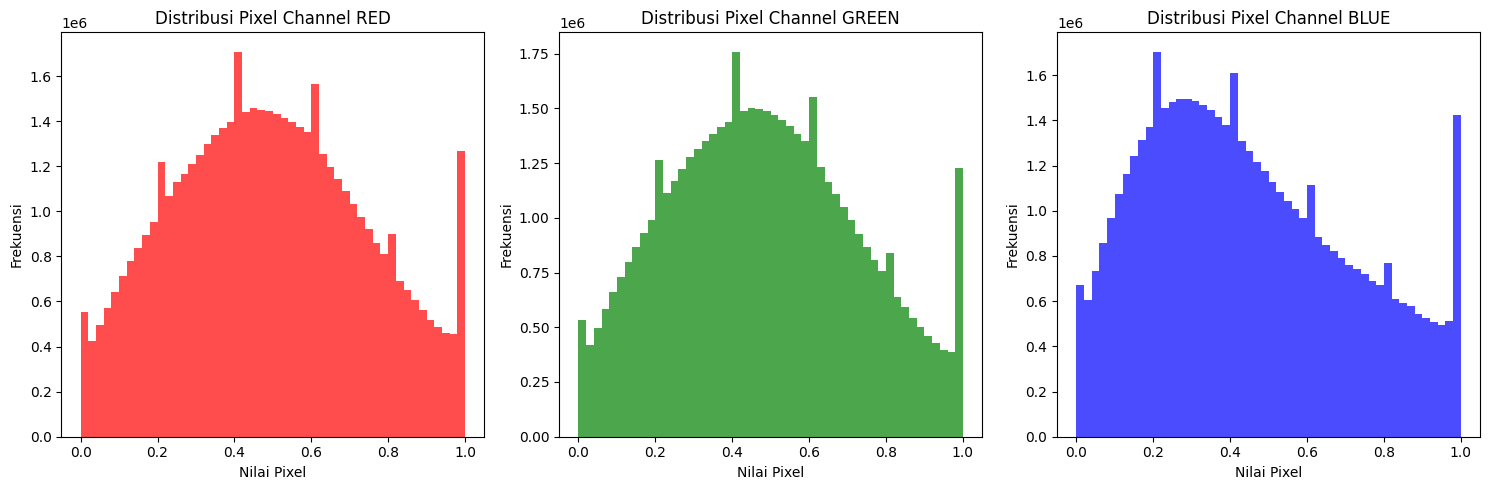


=== VISUALISASI DATA AUGMENTATION ===


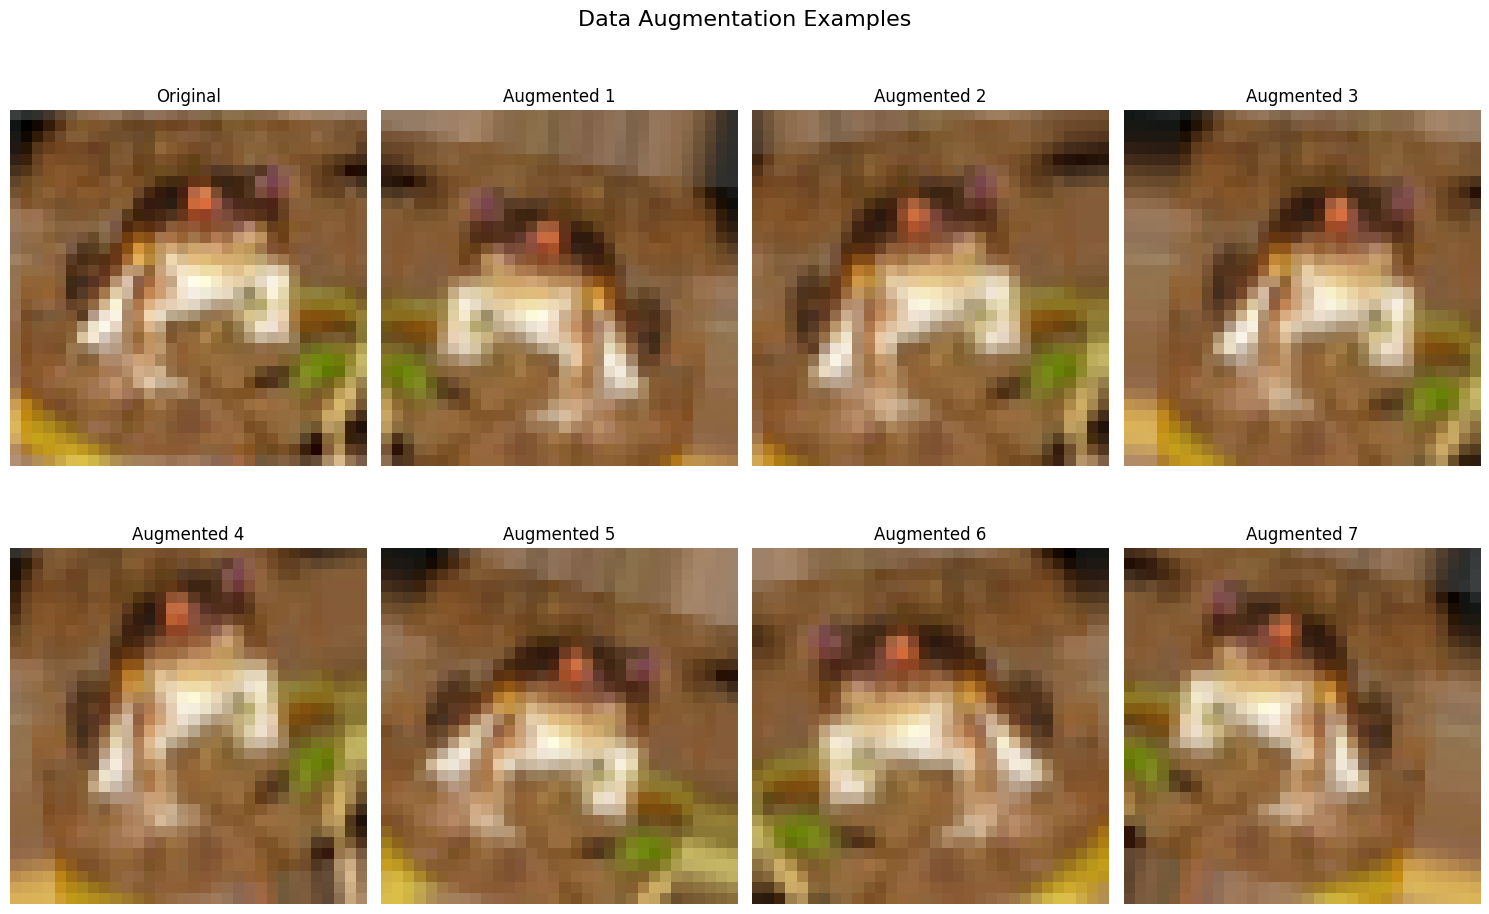


=== MEMBUAT DATA GENERATORS ===
Training split: (40000, 32, 32, 3)
Validation split: (10000, 32, 32, 3)
Batch size: 128
Training batches per epoch: 313
Validation batches per epoch: 79

=== PREPROCESSING SELESAI ===
Data siap untuk training model.


In [2]:
# CIFAR-10 Image Classification Competition
# Tahap 2: Data Preprocessing dan Augmentation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2

# Fungsi untuk load dan preprocess data
def load_and_preprocess_data():
    print("=== LOADING DAN PREPROCESSING DATA ===")

    # Load CIFAR-10 dataset
    (x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = keras.datasets.cifar10.load_data()

    # Flatten labels
    y_train_orig = y_train_orig.flatten()
    y_test_orig = y_test_orig.flatten()

    print(f"Original training data: {x_train_orig.shape}")
    print(f"Original test data: {x_test_orig.shape}")

    return x_train_orig, y_train_orig, x_test_orig, y_test_orig

# Fungsi untuk normalisasi data
def normalize_data(x_train, x_test):
    print("\n=== NORMALISASI DATA ===")

    # Convert ke float32 dan normalisasi ke range [0, 1]
    x_train_norm = x_train.astype('float32') / 255.0
    x_test_norm = x_test.astype('float32') / 255.0

    print(f"Setelah normalisasi:")
    print(f"Training data - Min: {x_train_norm.min():.3f}, Max: {x_train_norm.max():.3f}")
    print(f"Test data - Min: {x_test_norm.min():.3f}, Max: {x_test_norm.max():.3f}")

    return x_train_norm, x_test_norm

# Fungsi untuk preprocessing labels
def preprocess_labels(y_train, y_test, num_classes=10):
    print("\n=== PREPROCESSING LABELS ===")

    # Convert labels ke categorical (one-hot encoding)
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    print(f"Original labels shape: {y_train.shape}")
    print(f"Categorical labels shape: {y_train_cat.shape}")
    print(f"Number of classes: {num_classes}")

    return y_train_cat, y_test_cat

# Fungsi untuk data augmentation
def create_data_generators(x_train, y_train, validation_split=0.2, batch_size=128):
    print("\n=== MEMBUAT DATA GENERATORS ===")

    # Split training data menjadi train dan validation
    x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
        x_train, y_train, test_size=validation_split, random_state=42, stratify=y_train
    )

    print(f"Training split: {x_train_split.shape}")
    print(f"Validation split: {x_val_split.shape}")

    # Data augmentation untuk training
    train_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1,
        shear_range=0.1,
        fill_mode='nearest'
    )

    # No augmentation untuk validation
    val_datagen = ImageDataGenerator()

    # Create generators
    train_generator = train_datagen.flow(
        x_train_split, y_train_split,
        batch_size=batch_size,
        shuffle=True
    )

    val_generator = val_datagen.flow(
        x_val_split, y_val_split,
        batch_size=batch_size,
        shuffle=False
    )

    print(f"Batch size: {batch_size}")
    print(f"Training batches per epoch: {len(train_generator)}")
    print(f"Validation batches per epoch: {len(val_generator)}")

    return train_generator, val_generator, (x_val_split, y_val_split)

# Fungsi untuk visualisasi augmented data
def visualize_augmentation(x_train, y_train):
    print("\n=== VISUALISASI DATA AUGMENTATION ===")

    # Ambil satu sample
    sample_idx = 0
    sample_image = x_train[sample_idx:sample_idx+1]
    sample_label = y_train[sample_idx:sample_idx+1]

    # Create augmentation generator
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1,
        shear_range=0.1,
        fill_mode='nearest'
    )

    # Generate augmented samples
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(2, 4, 1)
    plt.imshow(sample_image[0])
    plt.title('Original')
    plt.axis('off')

    # Generate 7 augmented versions
    aug_iter = datagen.flow(sample_image, batch_size=1)
    for i in range(7):
        plt.subplot(2, 4, i + 2)
        augmented = next(aug_iter)[0]
        plt.imshow(augmented)
        plt.title(f'Augmented {i+1}')
        plt.axis('off')

    plt.suptitle('Data Augmentation Examples', fontsize=16)
    plt.tight_layout()
    plt.savefig('plots/data_augmentation.png', dpi=300, bbox_inches='tight')
    plt.show()

# Fungsi untuk analisis distribusi pixel
def analyze_pixel_distribution(x_train_norm):
    print("\n=== ANALISIS DISTRIBUSI PIXEL ===")

    # Hitung statistik untuk setiap channel
    for channel in range(3):
        channel_data = x_train_norm[:, :, :, channel]
        print(f"Channel {channel} (RGB: {'RGB'[channel]}):")
        print(f"  Mean: {channel_data.mean():.4f}")
        print(f"  Std: {channel_data.std():.4f}")
        print(f"  Min: {channel_data.min():.4f}")
        print(f"  Max: {channel_data.max():.4f}")

    # Plot histogram untuk setiap channel
    plt.figure(figsize=(15, 5))
    colors = ['red', 'green', 'blue']

    for channel in range(3):
        plt.subplot(1, 3, channel + 1)
        channel_data = x_train_norm[:, :, :, channel].flatten()
        plt.hist(channel_data, bins=50, alpha=0.7, color=colors[channel])
        plt.title(f'Distribusi Pixel Channel {colors[channel].upper()}')
        plt.xlabel('Nilai Pixel')
        plt.ylabel('Frekuensi')

    plt.tight_layout()
    plt.savefig('plots/pixel_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main preprocessing pipeline
def main_preprocessing():
    print("TAHAP 2: DATA PREPROCESSING")
    print("=" * 50)

    # Load data
    x_train_orig, y_train_orig, x_test_orig, y_test_orig = load_and_preprocess_data()

    # Normalize data
    x_train_norm, x_test_norm = normalize_data(x_train_orig, x_test_orig)

    # Preprocess labels
    y_train_cat, y_test_cat = preprocess_labels(y_train_orig, y_test_orig)

    # Analyze pixel distribution
    analyze_pixel_distribution(x_train_norm)

    # Visualize augmentation
    visualize_augmentation(x_train_norm, y_train_cat)

    # Create data generators
    train_gen, val_gen, val_data = create_data_generators(
        x_train_norm, y_train_cat,
        validation_split=0.2,
        batch_size=128
    )

    print("\n=== PREPROCESSING SELESAI ===")
    print("Data siap untuk training model.")

    return {
        'x_train': x_train_norm,
        'y_train': y_train_cat,
        'x_test': x_test_norm,
        'y_test': y_test_cat,
        'train_generator': train_gen,
        'val_generator': val_gen,
        'val_data': val_data,
        'original_labels': (y_train_orig, y_test_orig)
    }

# Execute preprocessing
if __name__ == "__main__":
    preprocessed_data = main_preprocessing()

In [3]:
# CIFAR-10 Image Classification Competition
# Tahap 3: Model Architecture dan Training

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membuat CNN Model Custom
def create_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    print("=== MEMBUAT CUSTOM CNN MODEL ===")

    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    print(f"Custom CNN Model created")
    print(f"Total parameters: {model.count_params():,}")

    return model

# Fungsi untuk membuat Advanced CNN Model
def create_advanced_cnn(input_shape=(32, 32, 3), num_classes=10):
    print("=== MEMBUAT ADVANCED CNN MODEL ===")

    model = models.Sequential([
        # Block 1
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # Block 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Block 4
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),

        # Dense layers
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    print(f"Advanced CNN Model created")
    print(f"Total parameters: {model.count_params():,}")

    return model

# Fungsi untuk membuat ResNet-inspired model
def create_resnet_inspired(input_shape=(32, 32, 3), num_classes=10):
    print("=== MEMBUAT RESNET-INSPIRED MODEL ===")

    def residual_block(x, filters, kernel_size=3, stride=1):
        # Shortcut connection
        shortcut = x

        # First convolution
        x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        # Second convolution
        x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
        x = layers.BatchNormalization()(x)

        # Adjust shortcut if needed
        if stride != 1 or shortcut.shape[-1] != filters:
            shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        # Add shortcut
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)

        return x

    # Input
    input_layer = layers.Input(shape=input_shape)

    # Initial convolution
    x = layers.Conv2D(64, 7, strides=2, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(input_layer, output)

    print(f"ResNet-inspired Model created")
    print(f"Total parameters: {model.count_params():,}")

    return model

# Fungsi untuk create transfer learning model
def create_transfer_learning_model(base_model_name='ResNet50', input_shape=(32, 32, 3), num_classes=10):
    print(f"=== MEMBUAT TRANSFER LEARNING MODEL ({base_model_name}) ===")

    # Load base model
    if base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError(f"Unknown base model: {base_model_name}")

    # Freeze base model layers
    base_model.trainable = False

    # Add custom top layers
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    print(f"Transfer Learning Model ({base_model_name}) created")
    print(f"Base model parameters: {base_model.count_params():,}")
    print(f"Total parameters: {model.count_params():,}")
    print(f"Trainable parameters: {sum([tf.keras.utils.layer_utils.count_params(w) for w in model.trainable_weights]):,}")

    return model, base_model

# Fungsi untuk compile model dengan optimizer terbaik
def compile_model(model, optimizer_name='Adam', learning_rate=0.001):
    print(f"\n=== COMPILING MODEL ===")
    print(f"Optimizer: {optimizer_name}")
    print(f"Learning Rate: {learning_rate}")

    # Pilih optimizer
    if optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'AdamW':
        optimizer = optimizers.AdamW(learning_rate=learning_rate, weight_decay=0.0001)
    elif optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_name == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy', 'top_3_accuracy']
    )

    print("Model compiled successfully")
    return model

# Fungsi untuk setup callbacks
def setup_callbacks(model_name, patience=10):
    print(f"\n=== SETTING UP CALLBACKS ===")

    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=patience,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            filepath=f'models/best_{model_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            save_weights_only=False,
            verbose=1
        )
    ]

    print(f"Callbacks setup: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint")
    return callbacks

# Fungsi untuk training model
def train_model(model, train_generator, val_generator, model_name, epochs=100):
    print(f"\n=== TRAINING MODEL: {model_name} ===")
    print(f"Epochs: {epochs}")
    print(f"Training batches: {len(train_generator)}")
    print(f"Validation batches: {len(val_generator)}")

    # Setup callbacks
    callbacks = setup_callbacks(model_name)

    # Training
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=callbacks,
        verbose=1
    )

    print(f"Training completed for {model_name}")
    return history

# Fungsi untuk plot training history
def plot_training_history(history, model_name):
    print(f"\n=== PLOTTING TRAINING HISTORY: {model_name} ===")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot training & validation accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Plot training & validation loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Plot top-3 accuracy
    if 'top_3_accuracy' in history.history:
        axes[1, 0].plot(history.history['top_3_accuracy'], label='Training Top-3 Accuracy')
        axes[1, 0].plot(history.history['val_top_3_accuracy'], label='Validation Top-3 Accuracy')
        axes[1, 0].set_title('Top-3 Accuracy')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Top-3 Accuracy')
        axes[1, 0].legend()
        axes[1, 0].grid(True)

    # Plot learning rate (if available)
    if 'lr' in history.history:
        axes[1, 1].plot(history.history['lr'], label='Learning Rate')
        axes[1, 1].set_title('Learning Rate Schedule')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_yscale('log')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
    else:
        axes[1, 1].axis('off')

    plt.suptitle(f'Training History - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'plots/training_history_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print best metrics
    best_val_acc = max(history.history['val_accuracy'])
    best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
    print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_epoch}")

# Fungsi untuk fine-tuning transfer learning model
def fine_tune_model(model, base_model, train_generator, val_generator, model_name, epochs=50):
    print(f"\n=== FINE-TUNING MODEL: {model_name} ===")

    # Unfreeze base model layers
    base_model.trainable = True

    # Use a lower learning rate for fine-tuning
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001/10),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'top_3_accuracy']
    )

    print(f"Trainable parameters after unfreezing: {sum([tf.keras.utils.layer_utils.count_params(w) for w in model.trainable_weights]):,}")

    # Setup callbacks with more patience
    callbacks = setup_callbacks(f"{model_name}_finetuned", patience=15)

    # Fine-tuning
    history_finetune = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=callbacks,
        verbose=1
    )

    print(f"Fine-tuning completed for {model_name}")
    return history_finetune

# Model factory function
def create_model(model_type='custom_cnn', input_shape=(32, 32, 3), num_classes=10):
    print(f"\n=== CREATING MODEL: {model_type.upper()} ===")

    if model_type == 'custom_cnn':
        model = create_custom_cnn(input_shape, num_classes)
        base_model = None
    elif model_type == 'advanced_cnn':
        model = create_advanced_cnn(input_shape, num_classes)
        base_model = None
    elif model_type == 'resnet_inspired':
        model = create_resnet_inspired(input_shape, num_classes)
        base_model = None
    elif model_type == 'transfer_resnet50':
        model, base_model = create_transfer_learning_model('ResNet50', input_shape, num_classes)
    elif model_type == 'transfer_vgg16':
        model, base_model = create_transfer_learning_model('VGG16', input_shape, num_classes)
    elif model_type == 'transfer_efficientnet':
        model, base_model = create_transfer_learning_model('EfficientNetB0', input_shape, num_classes)
    else:
        raise ValueError(f"Unknown model type: {model_type}")

    return model, base_model

# Main model training pipeline
def main_model_training(preprocessed_data, model_configs):
    print("TAHAP 3: MODEL TRAINING")
    print("=" * 50)

    train_generator = preprocessed_data['train_generator']
    val_generator = preprocessed_data['val_generator']

    trained_models = {}
    training_histories = {}

    for config in model_configs:
        model_name = config['name']
        model_type = config['type']
        optimizer = config.get('optimizer', 'Adam')
        learning_rate = config.get('learning_rate', 0.001)
        epochs = config.get('epochs', 100)

        print(f"\n{'='*60}")
        print(f"TRAINING MODEL: {model_name}")
        print(f"{'='*60}")

        try:
            # Create model
            model, base_model = create_model(model_type)

            # Compile model
            model = compile_model(model, optimizer, learning_rate)

            # Print model summary
            print(f"\nModel Summary:")
            model.summary()

            # Train model
            history = train_model(model, train_generator, val_generator, model_name, epochs)

            # Plot training history
            plot_training_history(history, model_name)

            # Store results
            trained_models[model_name] = model
            training_histories[model_name] = history

            # Fine-tune if transfer learning model
            if base_model is not None and config.get('fine_tune', False):
                print(f"\nStarting fine-tuning for {model_name}...")
                history_ft = fine_tune_model(model, base_model, train_generator, val_generator, model_name)
                plot_training_history(history_ft, f"{model_name}_finetuned")
                training_histories[f"{model_name}_finetuned"] = history_ft

            print(f"\n✓ Model {model_name} training completed successfully")

        except Exception as e:
            print(f"✗ Error training model {model_name}: {str(e)}")
            continue

    print(f"\n=== MODEL TRAINING SELESAI ===")
    print(f"Total models trained: {len(trained_models)}")

    return trained_models, training_histories

# Example model configurations
OPTIMAL_MODEL_CONFIGS = [
    {
        'name': 'custom_cnn_v1',
        'type': 'custom_cnn',
        'optimizer': 'Adam',
        'learning_rate': 0.001,
        'epochs': 100
    },
    {
        'name': 'advanced_cnn_v1',
        'type': 'advanced_cnn',
        'optimizer': 'AdamW',
        'learning_rate': 0.001,
        'epochs': 150
    },
    {
        'name': 'resnet_inspired_v1',
        'type': 'resnet_inspired',
        'optimizer': 'Adam',
        'learning_rate': 0.0005,
        'epochs': 120
    },
    {
        'name': 'transfer_resnet50_v1',
        'type': 'transfer_resnet50',
        'optimizer': 'Adam',
        'learning_rate': 0.001,
        'epochs': 80,
        'fine_tune': True
    }
]

# Execute model training
if __name__ == "__main__":
    # This would be called with preprocessed_data from previous stage
    # trained_models, histories = main_model_training(preprocessed_data, OPTIMAL_MODEL_CONFIGS)
    print("Model architecture definitions ready for training.")

Model architecture definitions ready for training.


In [4]:
# CIFAR-10 Image Classification Competition
# Tahap 4: Model Evaluation dan Performance Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
import time

# CIFAR-10 class names
CIFAR10_CLASSES = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

# Fungsi untuk evaluate single model
def evaluate_model(model, x_test, y_test, model_name, batch_size=128):
    print(f"\n=== EVALUATING MODEL: {model_name} ===")

    start_time = time.time()

    # Predict
    y_pred_proba = model.predict(x_test, batch_size=batch_size, verbose=1)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)

    evaluation_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    # Top-k accuracy
    top_3_acc = tf.keras.metrics.top_k_categorical_accuracy(y_test, y_pred_proba, k=3).numpy().mean()
    top_5_acc = tf.keras.metrics.top_k_categorical_accuracy(y_test, y_pred_proba, k=5).numpy().mean()

    # Per-class metrics
    per_class_metrics = classification_report(y_true, y_pred,
                                            target_names=list(CIFAR10_CLASSES.values()),
                                            output_dict=True)

    # Results summary
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'top_3_accuracy': top_3_acc,
        'top_5_accuracy': top_5_acc,
        'evaluation_time': evaluation_time,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'per_class_metrics': per_class_metrics
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Top-3 Accuracy: {top_3_acc:.4f}")
    print(f"Top-5 Accuracy: {top_5_acc:.4f}")
    print(f"Evaluation Time: {evaluation_time:.2f} seconds")

    return results

# Fungsi untuk membuat confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, normalize=True):
    print(f"\n=== CONFUSION MATRIX: {model_name} ===")

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        title = f'Normalized Confusion Matrix - {model_name}'
    else:
        cm_norm = cm
        fmt = 'd'
        title = f'Confusion Matrix - {model_name}'

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_norm, annot=True, fmt=fmt, cmap='Blues',
            xticklabels=list(CIFAR10_CLASSES.values()),
            yticklabels=list(CIFAR10_CLASSES.values()))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'plots/confusion_matrix_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return cm

# Fungsi untuk plot per-class performance
def plot_per_class_performance(per_class_metrics, model_name):
    print(f"\n=== PER-CLASS PERFORMANCE: {model_name} ===")

    classes = list(CIFAR10_CLASSES.values())
    metrics = ['precision', 'recall', 'f1-score']

    data = []
    for class_name in classes:
        if class_name in per_class_metrics:
            for metric in metrics:
                data.append({
                    'Class': class_name,
                    'Metric': metric.capitalize(),
                    'Score': per_class_metrics[class_name][metric]
                })

    df = pd.DataFrame(data)

    plt.figure(figsize=(15, 8))
    sns.barplot(data=df, x='Class', y='Score', hue='Metric')
    plt.title(f'Per-Class Performance Metrics - {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.savefig(f'plots/per_class_performance_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Fungsi untuk plot prediction distribution
def plot_prediction_distribution(y_pred_proba, model_name):
    print(f"\n=== PREDICTION DISTRIBUTION: {model_name} ===")

    # Calculate confidence scores (max probability for each prediction)
    confidence_scores = np.max(y_pred_proba, axis=1)

    plt.figure(figsize=(12, 5))

    # Confidence distribution
    plt.subplot(1, 2, 1)
    plt.hist(confidence_scores, bins=50, alpha=0.7, edgecolor='black')
    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Max Probability')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(confidence_scores), color='red', linestyle='--',
                label=f'Mean: {np.mean(confidence_scores):.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Class prediction distribution
    plt.subplot(1, 2, 2)
    predicted_classes = np.argmax(y_pred_proba, axis=1)
    class_counts = np.bincount(predicted_classes)
    class_names = [CIFAR10_CLASSES[i] for i in range(len(class_counts))]

    plt.bar(class_names, class_counts)
    plt.title('Predicted Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

    plt.suptitle(f'Prediction Analysis - {model_name}')
    plt.tight_layout()
    plt.savefig(f'plots/prediction_distribution_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print statistics
    print(f"Average confidence: {np.mean(confidence_scores):.4f}")
    print(f"Confidence std: {np.std(confidence_scores):.4f}")
    print(f"Low confidence predictions (<0.5): {np.sum(confidence_scores < 0.5)} ({100*np.sum(confidence_scores < 0.5)/len(confidence_scores):.1f}%)")

# Fungsi untuk visualize misclassified examples
def visualize_misclassified_examples(x_test, y_true, y_pred, y_pred_proba, model_name, num_examples=12):
    print(f"\n=== MISCLASSIFIED EXAMPLES: {model_name} ===")

    # Find misclassified examples
    misclassified_indices = np.where(y_true != y_pred)[0]

    if len(misclassified_indices) == 0:
        print("No misclassified examples found!")
        return

    # Sort by confidence (most confident wrong predictions first)
    confidence_scores = np.max(y_pred_proba[misclassified_indices], axis=1)
    sorted_indices = misclassified_indices[np.argsort(-confidence_scores)]

    # Select examples to show
    num_examples = min(num_examples, len(sorted_indices))
    selected_indices = sorted_indices[:num_examples]

    # Plot
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()

    for i, idx in enumerate(selected_indices):
        if i >= len(axes):
            break

        # Get image and predictions
        img = x_test[idx]
        true_class = CIFAR10_CLASSES[y_true[idx]]
        pred_class = CIFAR10_CLASSES[y_pred[idx]]
        confidence = np.max(y_pred_proba[idx])

        # Plot image
        axes[i].imshow(img)
        axes[i].set_title(f'True: {true_class}\nPred: {pred_class}\nConf: {confidence:.3f}',
                         fontsize=10)
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(num_examples, len(axes)):
        axes[i].axis('off')

    plt.suptitle(f'Most Confident Misclassifications - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'plots/misclassified_examples_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Showing {num_examples} most confident misclassifications")
    print(f"Total misclassified: {len(misclassified_indices)} out of {len(y_true)}")

# Fungsi untuk compare multiple models
def compare_models(evaluation_results):
    print("\n=== COMPARING ALL MODELS ===")

    # Create comparison dataframe
    comparison_data = []
    for result in evaluation_results:
        comparison_data.append({
            'Model': result['model_name'],
            'Accuracy': result['accuracy'],
            'Precision': result['precision'],
            'Recall': result['recall'],
            'F1-Score': result['f1_score'],
            'Top-3 Acc': result['top_3_accuracy'],
            'Top-5 Acc': result['top_5_accuracy'],
            'Eval Time (s)': result['evaluation_time']
        })

    df_comparison = pd.DataFrame(comparison_data)
    df_comparison = df_comparison.sort_values('Accuracy', ascending=False)

    print("\nModel Performance Comparison:")
    print(df_comparison.to_string(index=False, float_format='%.4f'))

    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy comparison
    axes[0, 0].bar(df_comparison['Model'], df_comparison['Accuracy'])
    axes[0, 0].set_title('Model Accuracy Comparison')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # F1-Score comparison
    axes[0, 1].bar(df_comparison['Model'], df_comparison['F1-Score'])
    axes[0, 1].set_title('Model F1-Score Comparison')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Top-k accuracy comparison
    x_pos = np.arange(len(df_comparison))
    width = 0.35
    axes[1, 0].bar(x_pos - width/2, df_comparison['Top-3 Acc'], width, label='Top-3')
    axes[1, 0].bar(x_pos + width/2, df_comparison['Top-5 Acc'], width, label='Top-5')
    axes[1, 0].set_title('Top-k Accuracy Comparison')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(df_comparison['Model'], rotation=45)
    axes[1, 0].legend()

    # Evaluation time comparison
    axes[1, 1].bar(df_comparison['Model'], df_comparison['Eval Time (s)'])
    axes[1, 1].set_title('Evaluation Time Comparison')
    axes[1, 1].set_ylabel('Time (seconds)')
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('plots/model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Save comparison to CSV
    df_comparison.to_csv('results/model_comparison.csv', index=False)
    print("\nComparison results saved to results/model_comparison.csv")

    return df_comparison

# Main evaluation pipeline
def main_evaluation(trained_models, preprocessed_data):
    print("TAHAP 4: MODEL EVALUATION")
    print("=" * 50)

    x_test = preprocessed_data['x_test']
    y_test = preprocessed_data['y_test']
    y_test_orig = preprocessed_data['original_labels'][1]

    evaluation_results = []

    for model_name, model in trained_models.items():
        print(f"\n{'='*60}")
        print(f"EVALUATING: {model_name}")
        print(f"{'='*60}")

        try:
            # Evaluate model
            result = evaluate_model(model, x_test, y_test, model_name)

            # Plot confusion matrix
            cm = plot_confusion_matrix(y_test_orig, result['predictions'], model_name)

            # Plot per-class performance
            plot_per_class_performance(result['per_class_metrics'], model_name)

            # Plot prediction distribution
            plot_prediction_distribution(result['probabilities'], model_name)

            # Visualize misclassified examples
            visualize_misclassified_examples(x_test, y_test_orig, result['predictions'],
                                           result['probabilities'], model_name)

            evaluation_results.append(result)

            print(f"\n✓ Evaluation completed for {model_name}")

        except Exception as e:
            print(f"✗ Error evaluating {model_name}: {str(e)}")
            continue

    # Compare all models
    if evaluation_results:
        comparison_df = compare_models(evaluation_results)

        # Find best model
        best_model_name = comparison_df.iloc[0]['Model']
        best_accuracy = comparison_df.iloc[0]['Accuracy']

        print(f"\n{'='*60}")
        print(f"BEST MODEL: {best_model_name}")
        print(f"BEST ACCURACY: {best_accuracy:.4f}")
        print(f"{'='*60}")

        return evaluation_results, best_model_name

    else:
        print("No models were successfully evaluated!")
        return [], None

# Execute evaluation
if __name__ == "__main__":
    print("Model evaluation functions ready.")
    # This would be called with trained_models and preprocessed_data
    # evaluation_results, best_model = main_evaluation(trained_models, preprocessed_data)

Model evaluation functions ready.
